In [ ]:
# Protection measures calculation:
# Find:
# column: Mode == 5 #Protection measure or safety mode
# Index start, end instance of mode ==5
# Duration from start, end index
# Count instances, maybe moving window 

import os
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

# ---- Set/select folder path for files ----
folder_path = r"C:\Users\KevWal\Downloads\20250515"  # ← Update if needed

# Load files
DataFrame = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        full_path = os.path.join(folder_path, filename)

        data = []
        with open(full_path, "r") as file:
            for line in file:
                clean = line.strip().strip('"').replace('""', '"')
                try:
                    parsed = json.loads(clean)
                    data.append(parsed)
                except json.JSONDecodeError:
                    print(f"Error decoding line in {filename}")

        df = pd.json_normalize(data)

        if 'input' in df and 'output' in df:
            input_df = pd.DataFrame(df['input'].tolist()).add_prefix('input')
            output_df = pd.DataFrame(df['output'].tolist()).add_prefix('output')
            full_df = pd.concat([df[['sn', 'time']], input_df, output_df], axis=1)

            full_df.rename(columns={
                'sn': 'sample_number',
                'input0': 'mode',
                'input1': 'phase',
                'input2': 'flex_damp_measure',
                'input3': 'ext_damp_measure',
                'input4': 'knee_angle (degree)',
                'input5': 'knee_velocity(degree/s)',
                'input6': 'thigh_position(degree)',
                'input7': 'thigh_velocity(degree/s)',
                'input8': 'calf_position(degree)',
                'input9': 'calf_velocity(degree/s)',
                'input10': 'calf_ang_acc_smooth(degree/s)',
                'input11': 'acc_abs_mag',
                'input12': 'acc_vertical_world',
                'input13': 'abs_knee_vel_avg(degree/s)',
                'input14': 'knee_velocity_history',
                'input15': 'reserved',
                'output0': 'motor_flex',
                'output1': 'motor_extent',
                'time': 'timestamp'
            }, inplace=True)

            df_name = filename.replace('.txt', '')
            DataFrame[df_name] = full_df

# Filter for specific files
prefixes = ["14-02-29", "13-30-18"]
# Mode == 5 #Protection measure or safety mode





# ---- Process each file ----
for file_name, df in DataFrame.items():
    if not any(file_name.startswith(p) for p in prefixes):
        continue

    print(f"\n📁 Processing file: {file_name}")
    save_folder = os.path.join(folder_path, file_name.split("_")[0])
    os.makedirs(save_folder, exist_ok=True)

    filtered_df = df[df['mode'] == 5].reset_index(drop=True)
    filtered_df['timestamp'] = pd.to_numeric(filtered_df['timestamp'], errors='coerce')# time adjustment
    filtered_df.dropna(subset=['timestamp'], inplace=True)
    filtered_df['timestamp'] -= filtered_df['timestamp'].iloc[0]

    for start in range(0, len(filtered_df), window_size):
            end = min(start + window_size, len(filtered_df))
            segment_df = filtered_df.iloc[start:end]

            fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
            axs[0].set_title(f"Thigh Position, Knee Angle and Calf Position vs Time {segment_df['timestamp'].iloc[0]:.2f}s)")
        
            #plot thigh_position(degree)
            axs[0].plot(sub['timestamp'], sub['thigh_position(degree)'], color=color, linewidth=1.2)
            #plot knee_angle (degree)
            axs[1].plot(sub['timestamp'], sub['knee_angle (degree)'], color=color, linewidth=1.2)
            # plot calf_position(degree)
            axs[2].plot(sub['timestamp'], sub['calf_position(degree)'], color=color, linewidth=1.2)
    
            axs[0].set_ylabel("Thigh Angle (°)")
            axs[1].set_ylabel("Knee Angle (°)")
            axs[2].set_ylabel("Calf Angle (°)")
    
            axs[1].set_xlabel("Time (s)")
            axs[0].legend()
            axs[0].grid(True)
            axs[1].grid(True)
    
            plt.tight_layout()
            plt.show()


# Analysis 
# Count instances, maybe moving window 





In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

# ---- Set folder path ----
folder_path = r"C:\Users\KevWal\Downloads\20250515"

# ---- Load files ----
DataFrame = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        full_path = os.path.join(folder_path, filename)
        data = []
        with open(full_path, "r") as file:
            for line in file:
                clean = line.strip().strip('"').replace('""', '"')
                try:
                    parsed = json.loads(clean)
                    data.append(parsed)
                except json.JSONDecodeError:
                    print(f"Error decoding line in {filename}")
        df = pd.json_normalize(data)
        if 'input' in df and 'output' in df:
            input_df = pd.DataFrame(df['input'].tolist()).add_prefix('input')
            output_df = pd.DataFrame(df['output'].tolist()).add_prefix('output')
            full_df = pd.concat([df[['sn', 'time']], input_df, output_df], axis=1)
            full_df.rename(columns={
                'sn': 'sample_number',
                'input0': 'mode',
                'input1': 'phase',
                'input4': 'knee_angle (degree)',
                'input5': 'knee_velocity(degree/s)',
                'input6': 'thigh_position(degree)',
                'input8': 'calf_position(degree)',
                'time': 'timestamp'
            }, inplace=True)
            df_name = filename.replace('.txt', '')
            DataFrame[df_name] = full_df

# ---- Filter for files ----
prefixes = ["14-02-29", "13-30-18"]

# ---- Protection mode detection ----
def find_mode_5_segments(mode_series):
    mode_5_segments = []
    in_segment = False
    start_idx = None

    for i, val in enumerate(mode_series):
        if val == 5 and not in_segment:
            in_segment = True
            start_idx = i
        elif val != 5 and in_segment:
            in_segment = False
            end_idx = i - 1
            mode_5_segments.append((start_idx, end_idx))

    if in_segment:
        mode_5_segments.append((start_idx, len(mode_series) - 1))

    return mode_5_segments

# ---- Process each file ----
for file_name, df in DataFrame.items():
    if not any(file_name.startswith(p) for p in prefixes):
        continue

    print(f"\n📁 Processing file: {file_name}")
    df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
    df.dropna(subset=['timestamp'], inplace=True)
    df['timestamp'] -= df['timestamp'].iloc[0]

    mode_5_segments = find_mode_5_segments(df['mode'])

    print(f"🔍 Found {len(mode_5_segments)} protection mode events.")

    for idx, (start_idx, end_idx) in enumerate(mode_5_segments):
        seg = df.iloc[start_idx:end_idx + 1].copy()
        duration = seg['timestamp'].iloc[-1] - seg['timestamp'].iloc[0]
        print(f"  ➤ Event {idx+1}: Start @ {seg['timestamp'].iloc[0]:.2f}s, "
              f"End @ {seg['timestamp'].iloc[-1]:.2f}s, Duration: {duration:.2f}s")

        # Plot thigh, knee, calf positions
        fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
        axs[0].plot(seg['timestamp'], seg['thigh_position(degree)'], color='blue')
        axs[1].plot(seg['timestamp'], seg['knee_angle (degree)'], color='green')
        axs[2].plot(seg['timestamp'], seg['calf_position(degree)'], color='red')

        axs[0].set_ylabel("Thigh Angle (°)")
        axs[1].set_ylabel("Knee Angle (°)")
        axs[2].set_ylabel("Calf Angle (°)")
        axs[2].set_xlabel("Time (s)")

        axs[0].set_title(f"Protection Mode Event {idx+1} — Duration: {duration:.2f}s")
        for ax in axs:
            ax.grid(True)

        plt.tight_layout()
        plt.show()



📁 Processing file: 13-30-18_kelly test 4 new turn downhill 4_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 14-02-29_kelly test 4 new turn downhill bw sr_algorithm
🔍 Found 0 protection mode events.



📁 Processing file: 10-27-51__algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 10-28-00_kelly test 1_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 10-33-13_kelly test 2_algorithm
🔍 Found 2 protection mode events.
  ➤ Event 1: Start @ 733.30s, End @ 736.34s, Duration: 3.04s


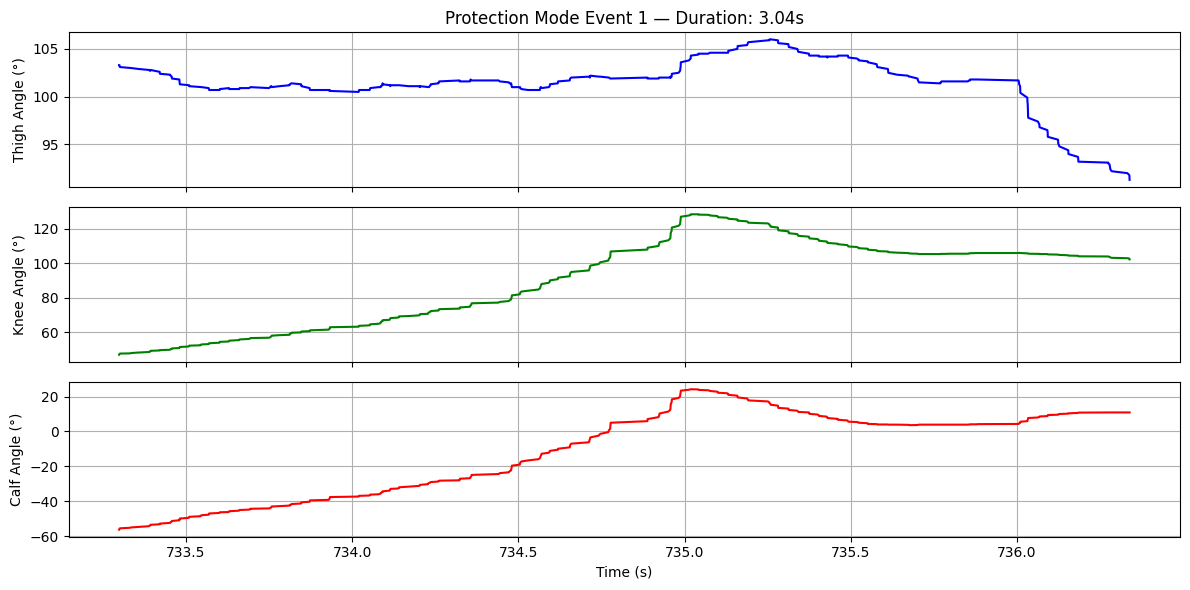

  ➤ Event 2: Start @ 741.41s, End @ 744.44s, Duration: 3.03s


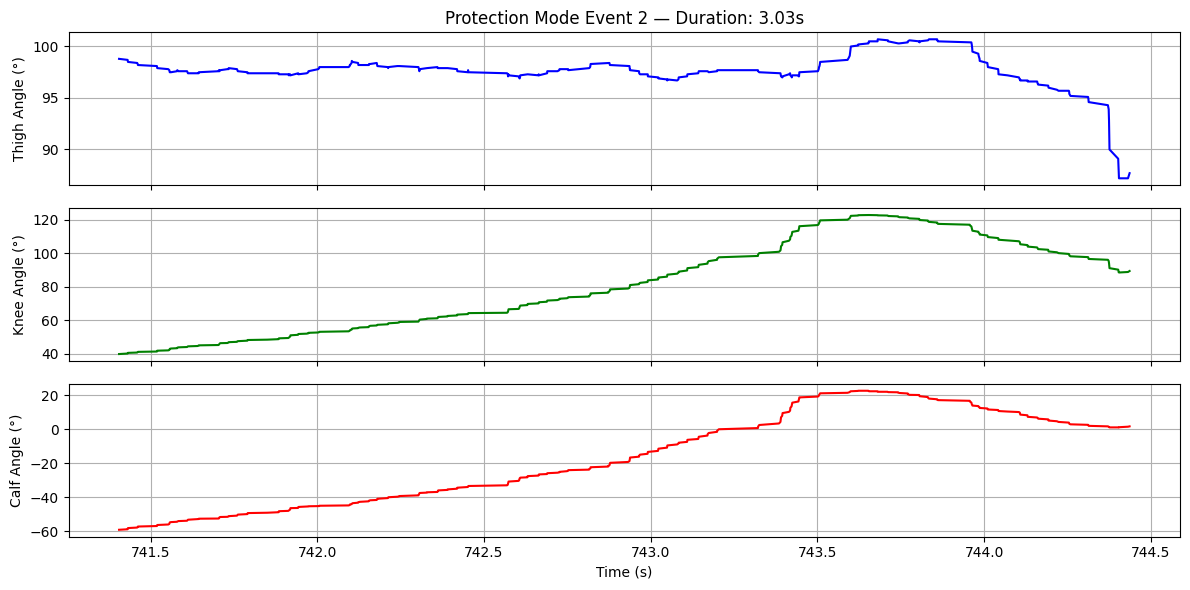


📁 Processing file: 10-49-58_kelly test 3 yr 80_algorithm
🔍 Found 3 protection mode events.
  ➤ Event 1: Start @ 100.00s, End @ 103.03s, Duration: 3.03s


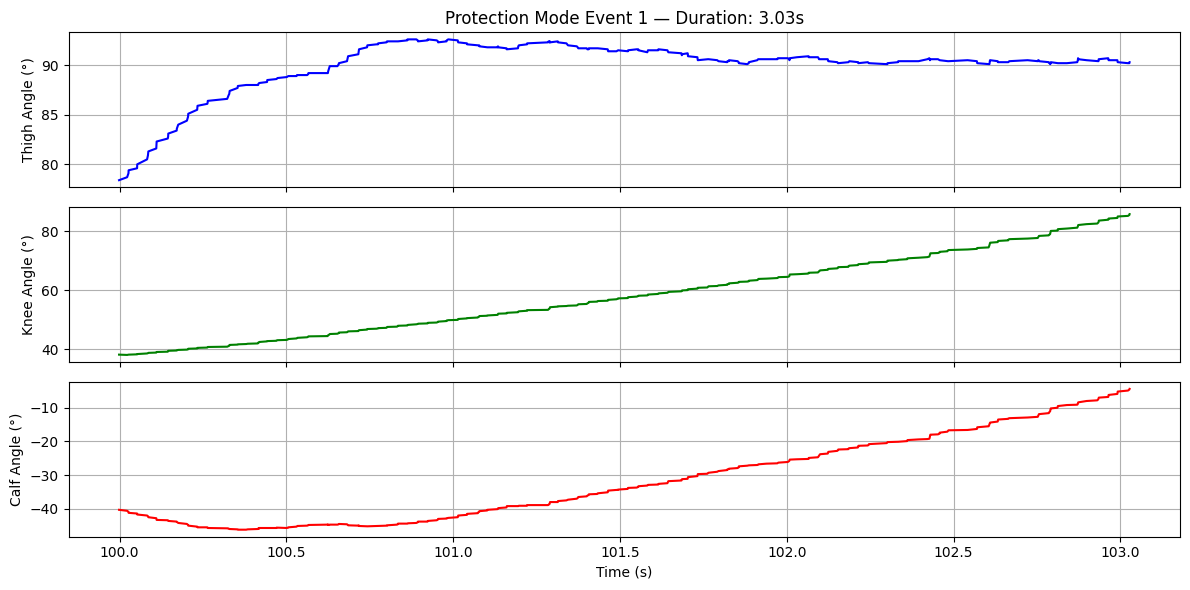

  ➤ Event 2: Start @ 223.21s, End @ 226.20s, Duration: 3.00s


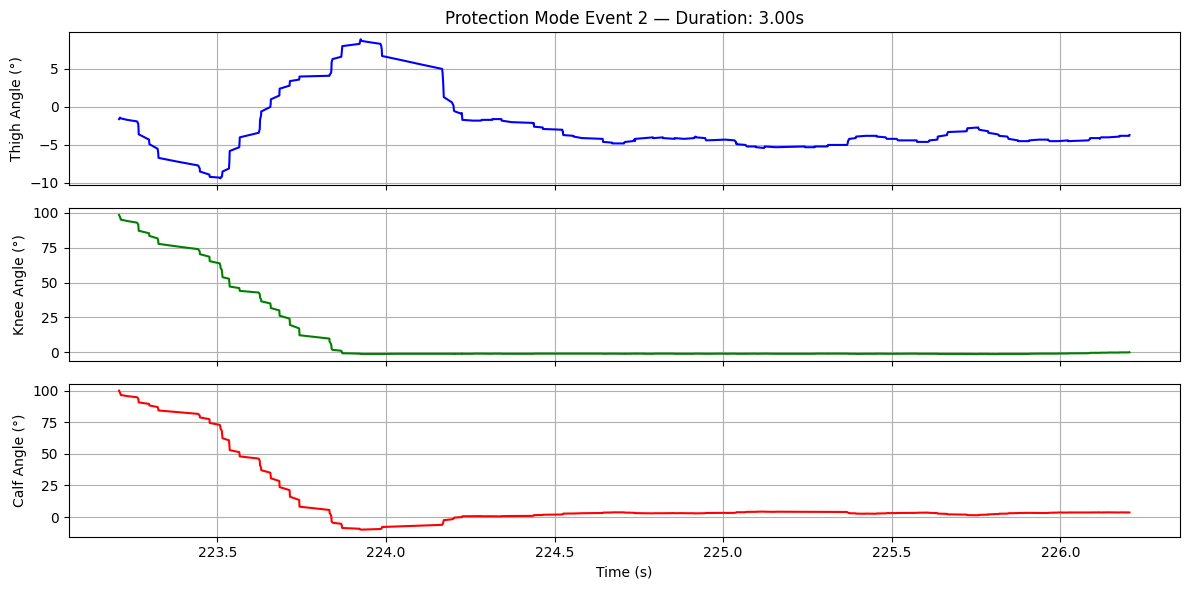

  ➤ Event 3: Start @ 354.61s, End @ 357.61s, Duration: 3.00s


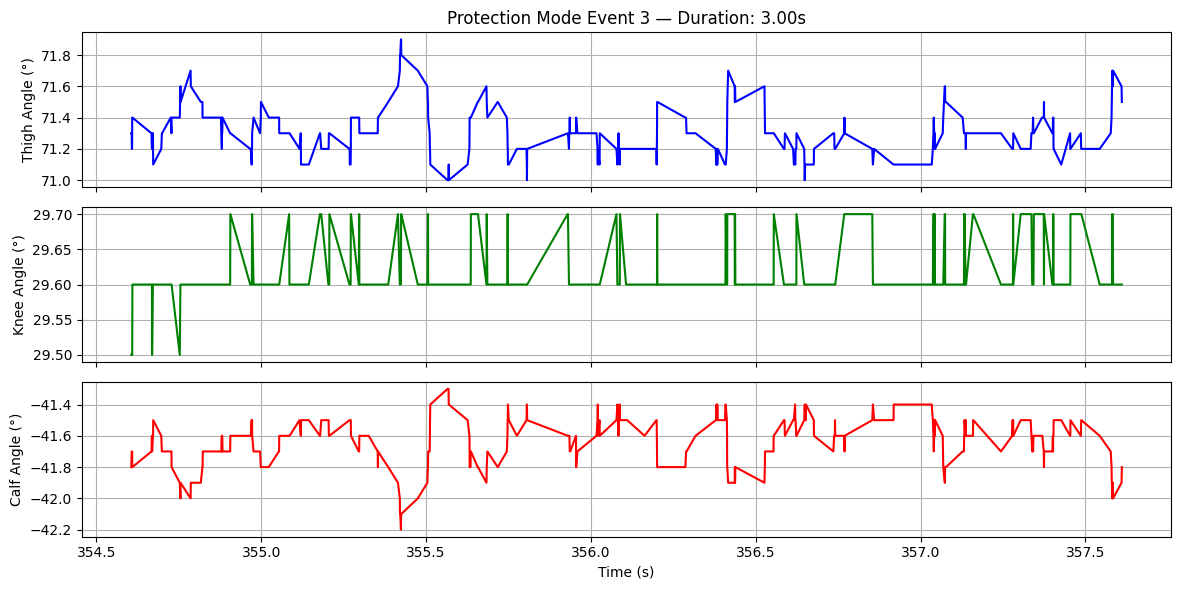


📁 Processing file: 11-10-32_kelly test 3 yr 70 downhill_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 11-13-44_kelly test 3 yr 70 downhill_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 11-20-59_kelly test 3 yr 70 car_algorithm
🔍 Found 1 protection mode events.
  ➤ Event 1: Start @ 86.28s, End @ 89.25s, Duration: 2.97s


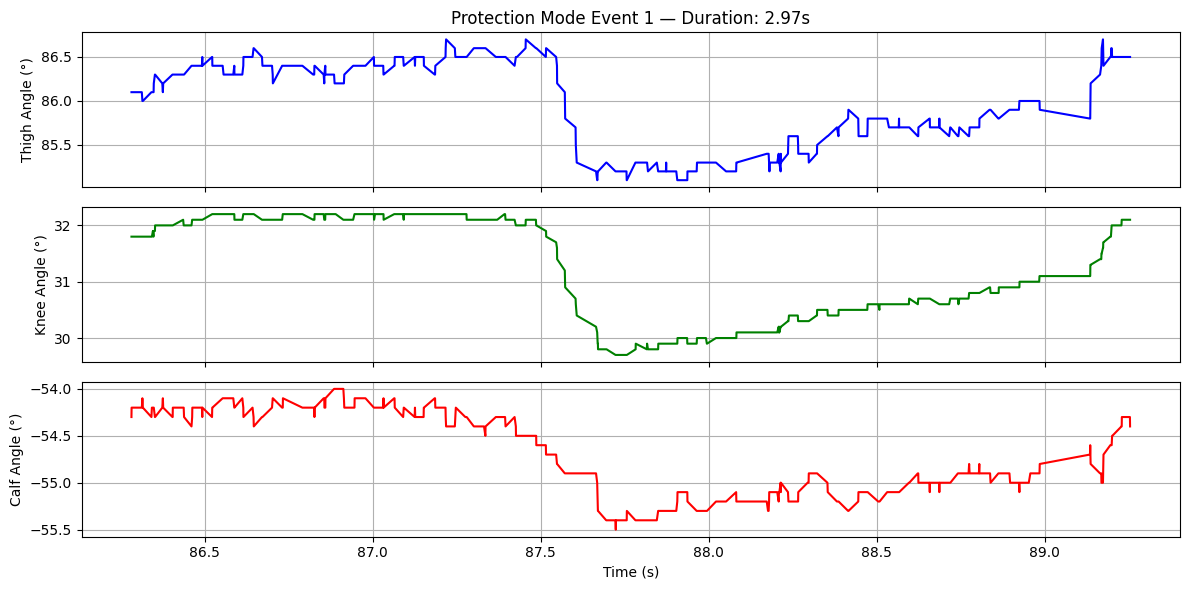


📁 Processing file: 11-25-04_kelly test 3 yr 70 car2_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 11-57-41_kelly test 4 new knee_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 12-11-53_kelly test 4 new knee 2_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 13-11-54_kelly test 4 new low_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 13-15-23_kelly test 4 new turn_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 13-18-24_kelly test 4 new turn 2_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 13-22-00_kelly test 4 new turn downhill 1_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 13-24-27_kelly test 4 new turn downhill 2_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 13-25-36_kelly test 4 new turn downhill 3_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 13-30-18_kelly test 4 new turn downhill 4_algorithm
🔍 Found 0 protection mode events.



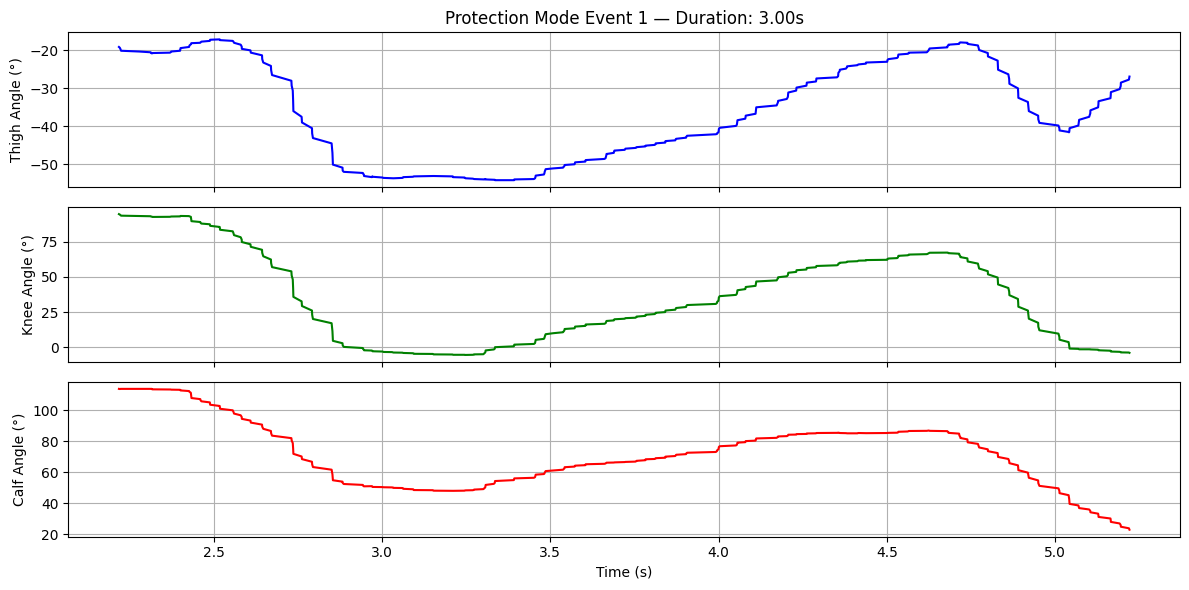

  ➤ Event 2: Start @ 124.32s, End @ 127.29s, Duration: 2.97s


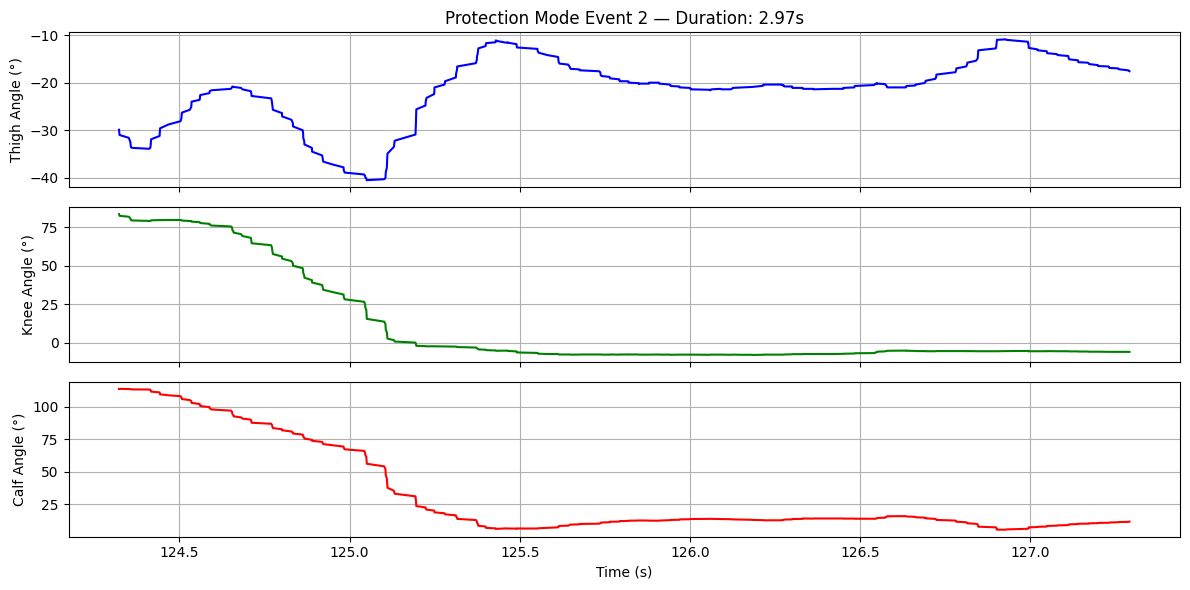

  ➤ Event 3: Start @ 430.30s, End @ 433.33s, Duration: 3.03s


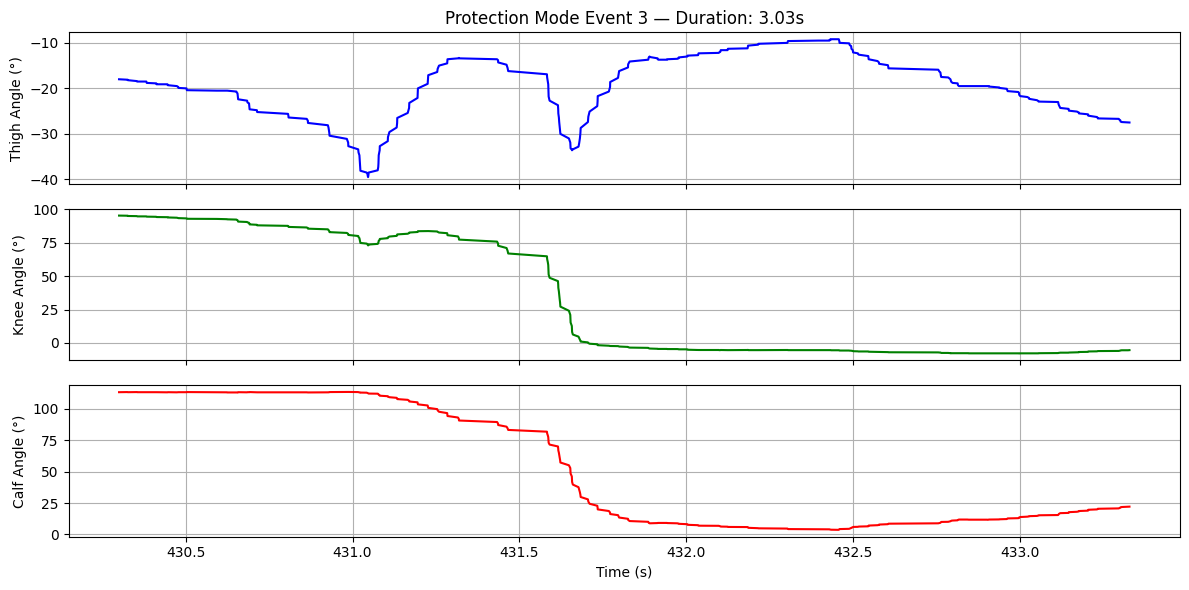

  ➤ Event 4: Start @ 460.24s, End @ 463.32s, Duration: 3.09s


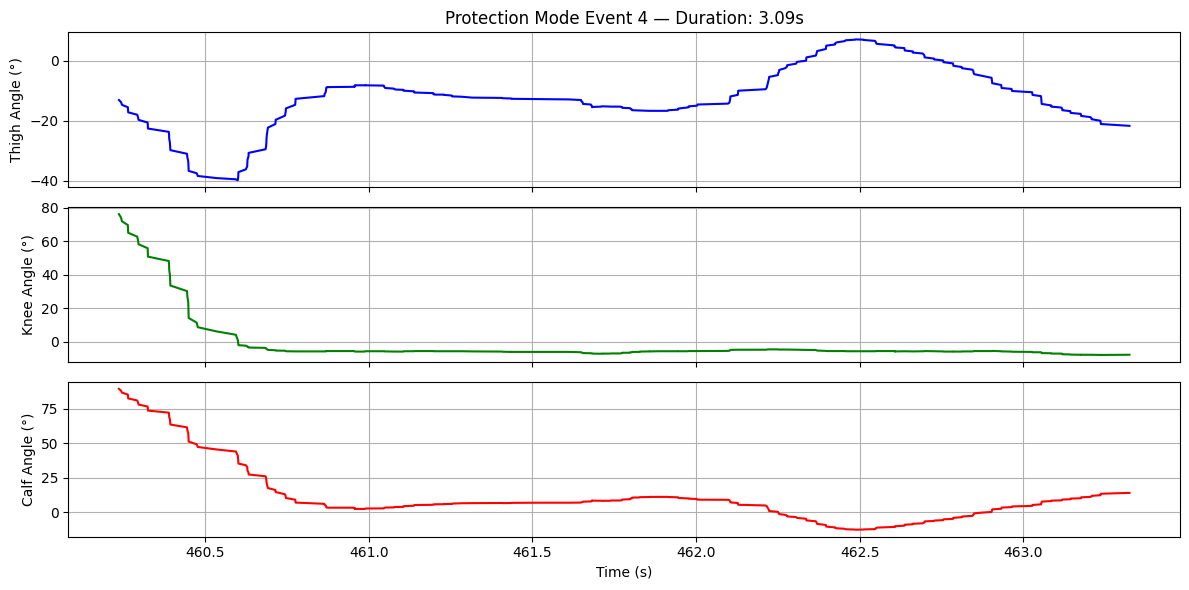

  ➤ Event 5: Start @ 483.31s, End @ 486.45s, Duration: 3.15s


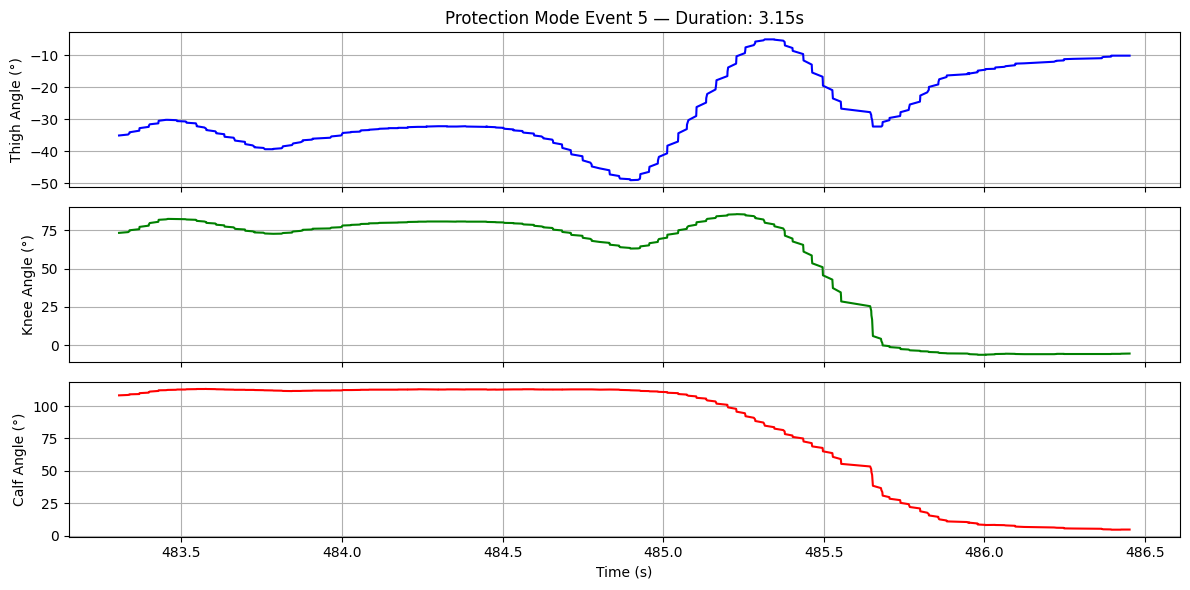

  ➤ Event 6: Start @ 507.13s, End @ 511.24s, Duration: 4.11s


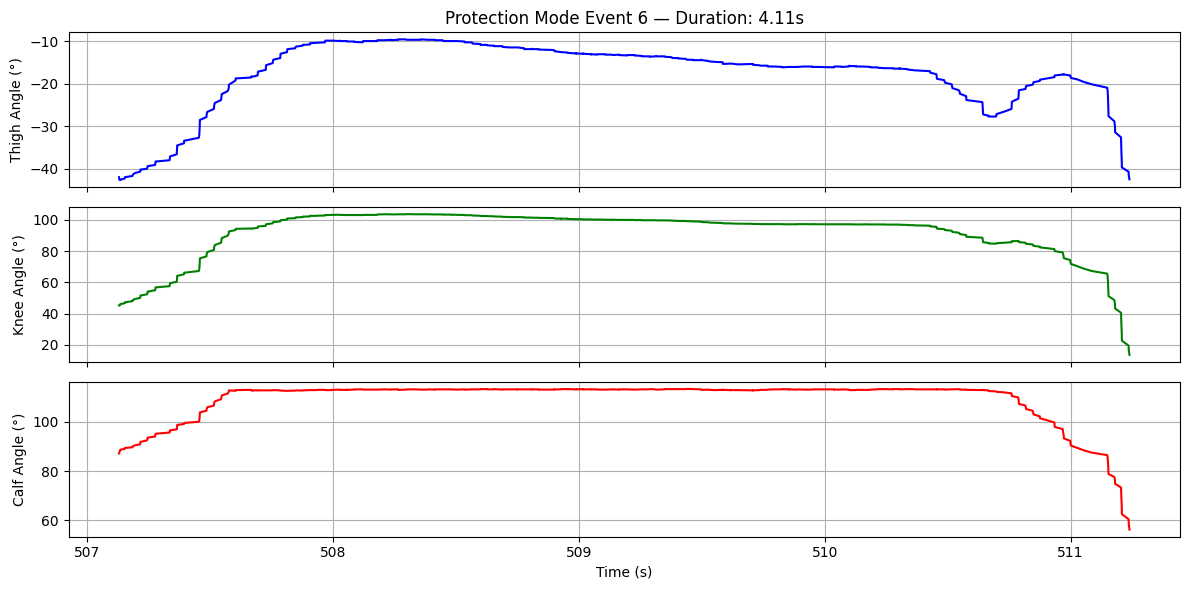

  ➤ Event 7: Start @ 529.35s, End @ 532.28s, Duration: 2.92s


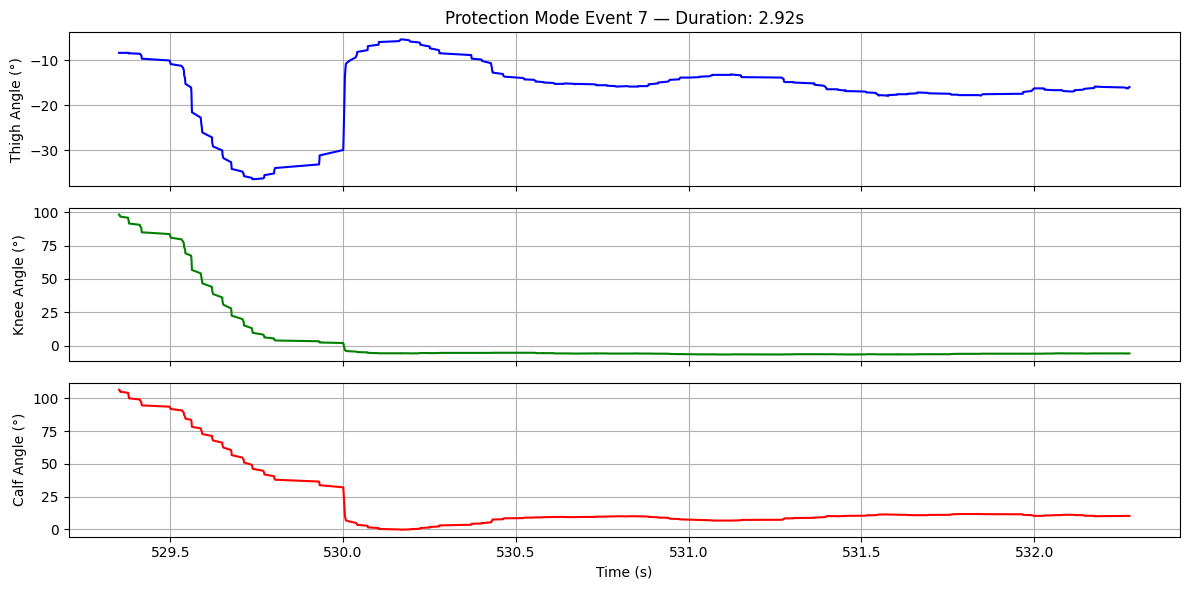


📁 Processing file: 14-02-29_kelly test 4 new turn downhill bw sr_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 14-03-58_kelly test 4 new turn downhill bw sr 2_algorithm
🔍 Found 0 protection mode events.

📁 Processing file: 14-12-34_kelly test 4 new turn downhill bw run_algorithm
🔍 Found 0 protection mode events.


In [2]:
#================================FOR USE==================

# Protection measures calculation:
# Find:
# column: Mode == 5 #Protection measure or safety mode
# Index start, end instance of mode ==5
# Duration from start, end index

import os
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

# ---- Set folder path ----
folder_path = r"C:\Users\KevWal\Downloads\20250515"

# ---- Load files ----
DataFrame = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        full_path = os.path.join(folder_path, filename)
        data = []
        with open(full_path, "r") as file:
            for line in file:
                clean = line.strip().strip('"').replace('""', '"')
                try:
                    parsed = json.loads(clean)
                    data.append(parsed)
                except json.JSONDecodeError:
                    print(f"Error decoding line in {filename}")
        df = pd.json_normalize(data)
        if 'input' in df and 'output' in df:
            input_df = pd.DataFrame(df['input'].tolist()).add_prefix('input')
            output_df = pd.DataFrame(df['output'].tolist()).add_prefix('output')
            full_df = pd.concat([df[['sn', 'time']], input_df, output_df], axis=1)
            full_df.rename(columns={
                'sn': 'sample_number',
                'input0': 'mode',
                'input1': 'phase',
                'input4': 'knee_angle (degree)',
                'input5': 'knee_velocity(degree/s)',
                'input6': 'thigh_position(degree)',
                'input8': 'calf_position(degree)',
                'time': 'timestamp'
            }, inplace=True)
            df_name = filename.replace('.txt', '')
            DataFrame[df_name] = full_df



# ---- Protection mode detection ----
def find_mode_5_segments(mode_series):
    mode_5_segments = []
    in_segment = False
    start_idx = None

    for i, val in enumerate(mode_series):
        if val == 5 and not in_segment:
            in_segment = True
            start_idx = i
        elif val != 5 and in_segment:
            in_segment = False
            end_idx = i - 1
            mode_5_segments.append((start_idx, end_idx))

    if in_segment:
        mode_5_segments.append((start_idx, len(mode_series) - 1))

    return mode_5_segments

# ---- Process each file ----
for file_name, df in DataFrame.items():
    

    print(f"\n📁 Processing file: {file_name}")
    df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
    df.dropna(subset=['timestamp'], inplace=True)
    df['timestamp'] -= df['timestamp'].iloc[0]

    mode_5_segments = find_mode_5_segments(df['mode'])

    print(f"🔍 Found {len(mode_5_segments)} protection mode events.")

    for idx, (start_idx, end_idx) in enumerate(mode_5_segments):
        seg = df.iloc[start_idx:end_idx + 1].copy()
        duration = seg['timestamp'].iloc[-1] - seg['timestamp'].iloc[0]
        print(f"  ➤ Event {idx+1}: Start @ {seg['timestamp'].iloc[0]:.2f}s, "
              f"End @ {seg['timestamp'].iloc[-1]:.2f}s, Duration: {duration:.2f}s")

        # Plot thigh, knee, calf positions
        fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
        axs[0].plot(seg['timestamp'], seg['thigh_position(degree)'], color='blue')
        axs[1].plot(seg['timestamp'], seg['knee_angle (degree)'], color='green')
        axs[2].plot(seg['timestamp'], seg['calf_position(degree)'], color='red')

        axs[0].set_ylabel("Thigh Angle (°)")
        axs[1].set_ylabel("Knee Angle (°)")
        axs[2].set_ylabel("Calf Angle (°)")
        axs[2].set_xlabel("Time (s)")

        axs[0].set_title(f"Protection Mode Event {idx+1} — Duration: {duration:.2f}s")
        for ax in axs:
            ax.grid(True)

        plt.tight_layout()
        plt.show()